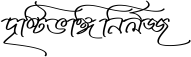

In [8]:
from PIL import ImageFont, Image, ImageDraw, ImageChops, ImageOps
from IPython.display import display

w, h = 64, 64
w0, h0 = 256, 256
blank = Image.new('L', (w0 * 5, h0 * 3), 255)
font = 'fonts/FN Suhrid Bornobilas Unicode.ttf'
font = ImageFont.truetype(font, 20)  
char = 'দৃষ্টিভঙ্গি নির্লজ্জ '
img = Image.new("L", (w0 * 5, h0 * 3), 255) 
draw = ImageDraw.Draw(img)
draw.text((w0, h0), char, font=font)
diff = ImageChops.difference(img, blank)
lx, ly, hx, hy = diff.getbbox()
img = img.crop((lx, ly, hx, hy))
# img.save('image' + '.png')
display(img)

In [2]:
import os

def get_image(font_path):
    w, h = 64, 64
    w0, h0 = 256, 256
    blank = Image.new('L', (w0 * 5, h0 * 3), 255)
    font = font_path #'FN Suhrid Bornobilas Unicode.ttf'
    font = ImageFont.truetype(font, 20)  
    char = 'গ্রন্থাগারের নীরব পরিবেশে, সঞ্চালিত নির্লজ্জ আলোচনাটি অতি মনোমুগ্ধকর দৃষ্টিভঙ্গি ছিল।'
    img = Image.new("L", (w0 * 5, h0 * 3), 255) 
    draw = ImageDraw.Draw(img)
    draw.text((w0, h0), char, font=font)
    diff = ImageChops.difference(img, blank)
    lx, ly, hx, hy = diff.getbbox()
    img = img.crop((lx, ly, hx, hy))
    # img.save('image' + '.png')
    # display(img)
    # pass
    return img

In [7]:
import os
from PIL import Image

# Ensure the images directory exists
os.makedirs('images', exist_ok=True)

# List of all font files in the fonts directory
font_files = [f for f in os.listdir('./fonts') if os.path.isfile(os.path.join('./fonts', f))]

# Start of the markdown content for README
readme_content = "<h1>Font Preview Gallery</h1>\n\n<p>This gallery showcases images generated with different fonts.</p>\n\n"

# Process each font
for i, font_file in enumerate(font_files):
    font_path = os.path.join('./fonts', font_file)
    image = get_image(font_path)
    image_name = os.path.splitext(font_file)[0] + '.png'
    image_path = os.path.join('images', image_name)
    image.save(image_path)

    # Add entry to the markdown content using HTML
    readme_content += f"<h2>{i+1}. {font_file}</h2>\n"
    readme_content += f"<img src=\"{image_path}\" alt=\"{font_file}\" />\n\n"

# Write the markdown content to README.md
with open('README.md', 'w') as readme_file:
    readme_file.write(readme_content)